In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

In [2]:
# Load the data from the CSV file

df = pd.read_csv("Canada_per_capita_income.csv")
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [4]:
df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


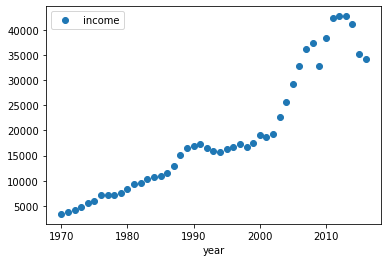

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

df.plot(x='year',y='income',style='o')
plt.show()

            year    income
year    1.000000  0.943884
income  0.943884  1.000000


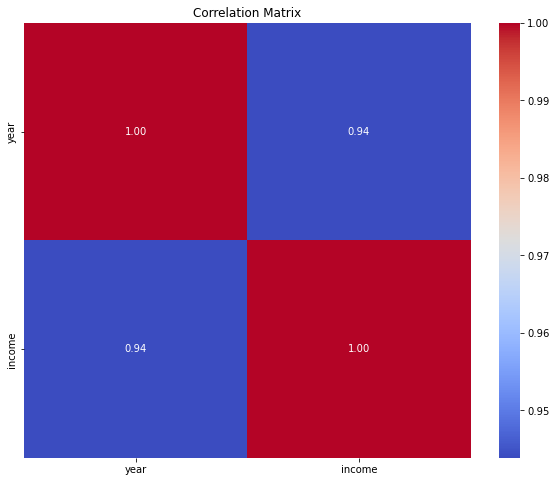

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap for better understanding
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Create the pandas DataFrame with the features and the pandas Series with the target

X = df[['year']]
Y = df['income']

In [8]:
# Training the Linear Regression Model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [9]:
# Print the coefficients of the trained model

coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeffs)

      Coefficient
year   828.465075


In [10]:
# Getting predictions from the model for the given examples.

predictions = lr.predict(X)

In [11]:
# Evaluate the model for its accuracy using various metrics such as RMSE and R squared

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))
print('Average Income:', Y.mean())
print('R-Squared:', metrics.r2_score(Y, predictions))

MAE: 3088.866427771443
RMSE: 3932.268945723928
Average Income: 18920.137063404254
R-Squared: 0.890916917957032


In [12]:
# Predict per capita income for the years 2020, 2021, 2022, and 2023

years_to_predict = np.array([[2020], [2021], [2022], [2023]])
predicted_income = lr.predict(years_to_predict)

In [13]:
# Print the predicted values

for year, income in zip(years_to_predict.flatten(), predicted_income):
    print(f"Predicted per capita income for Canada in {year}: {income:.2f}")

Predicted per capita income for Canada in 2020: 41288.69
Predicted per capita income for Canada in 2021: 42117.16
Predicted per capita income for Canada in 2022: 42945.62
Predicted per capita income for Canada in 2023: 43774.09
